In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install pandas matplotlib seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading data from a CSV file
url = '/content/SPARCS_data.csv'
data = pd.read_csv(url)

<ipython-input-5-d9e35329d36b>:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


In [6]:
# Subsetting to include specific columns
columns_to_keep = ['Age Group', 'Gender', 'Length of Stay', 'Total Charges', 'Total Costs', 'Type of Admission']
data_subset = data[columns_to_keep]

In [7]:
# Descriptive statistics
descriptive_stats = data_subset[['Length of Stay', 'Total Charges', 'Total Costs']].describe(percentiles=[.25, .5, .75])
print(descriptive_stats)

       Length of Stay Total Charges Total Costs
count         1048575       1048575     1048575
unique            120        965888      891480
top                 2     26,540.92    9,948.29
freq           230983           284         284


In [9]:
# Quartiles and percentiles
# Converting the relevant columns to numeric type before calculating percentiles
for col in ['Length of Stay', 'Total Charges', 'Total Costs']:
    data_subset[col] = pd.to_numeric(data_subset[col], errors='coerce')

percentiles = data_subset[['Length of Stay', 'Total Charges', 'Total Costs']].quantile([.25, .5, .75])
print(percentiles)

<ipython-input-9-01deee94316d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = pd.to_numeric(data_subset[col], errors='coerce')


      Length of Stay  Total Charges  Total Costs
0.25             2.0        499.000       658.47
0.50             3.0        795.160       810.70
0.75             6.0        944.935       915.16


In [25]:
# Calculate the average length of stay (mean)
average_length_of_stay = data_subset['Length of Stay'].mean()

# Display the result
print(f"The average length of stay is {average_length_of_stay:.2f} days.")


The average length of stay is 5.73 days.


In [26]:
# Calculate the average total charges (mean)
average_total_charges = data_subset['Total Charges'].mean()

# Display the result
print(f"The average total charges are ${average_total_charges:.2f}.")


The average total charges are $185548.13.


In [27]:
# Calculate the median total charges
median_total_charges = data_subset['Total Charges'].median()

# Display the result
print(f"The median total charges are ${median_total_charges:.2f}.")

The median total charges are $795.16.


In [28]:
# Group by 'Age Group' and calculate the mean of 'Total Costs'
mean_total_costs_by_age_group = data_subset.groupby('Age Group')['Total Costs'].mean()

# Display the result
print("Mean Total Costs by Age Group:")
print(mean_total_costs_by_age_group)

Mean Total Costs by Age Group:
Age Group
0 to 17        774.658107
18 to 29       755.191165
30 to 49       723.304791
50 to 69       703.375598
70 or Older    563.647500
Name: Total Costs, dtype: float64


In [29]:
# Group by 'Age Group' and calculate the median of 'Total Costs'
median_total_costs_by_age_group = data_subset.groupby('Age Group')['Total Costs'].median()

# Display the result
print("Median Total Costs by Age Group:")
print(median_total_costs_by_age_group)

Median Total Costs by Age Group:
Age Group
0 to 17        809.875
18 to 29       816.635
30 to 49       820.470
50 to 69       812.700
70 or Older    692.875
Name: Total Costs, dtype: float64


In [30]:
# Group by 'Type of Admission' and calculate the mean of 'Total Costs'
mean_total_costs_by_admission_type = data_subset.groupby('Type of Admission')['Total Costs'].mean()

# Display the result
print("Mean Total Costs by Type of Admission:")
print(mean_total_costs_by_admission_type)

Mean Total Costs by Type of Admission:
Type of Admission
Elective         645.175440
Emergency        719.659039
Newborn          775.144372
Not Available    845.710000
Trauma           103.460000
Urgent           773.093416
Name: Total Costs, dtype: float64


In [31]:
# Group by 'Type of Admission' and calculate the median of 'Total Costs'
median_total_costs_by_admission_type = data_subset.groupby('Type of Admission')['Total Costs'].median()

# Display the result
print("Median Total Costs by Type of Admission:")
print(median_total_costs_by_admission_type)

Median Total Costs by Type of Admission:
Type of Admission
Elective         735.105
Emergency        812.620
Newborn          811.110
Not Available    845.710
Trauma           103.460
Urgent           816.960
Name: Total Costs, dtype: float64


In [11]:
# Distribution of categorical variables
age_group_counts = data_subset['Age Group'].value_counts()
gender_counts = data_subset['Gender'].value_counts()
admission_type_counts = data_subset['Type of Admission'].value_counts()

print(age_group_counts)
print(gender_counts)
print(admission_type_counts)

Age Group
70 or Older    314316
50 to 69       283644
30 to 49       206348
0 to 17        149545
18 to 29        94722
Name: count, dtype: int64
Gender
F    575035
M    473406
U       134
Name: count, dtype: int64
Type of Admission
Emergency        697384
Elective         176125
Newborn           99217
Urgent            71827
Trauma             3502
Not Available       520
Name: count, dtype: int64


Mean Total Charges by Type of Admission:
Type of Admission
Elective         1.439160e+05
Emergency        2.510738e+05
Newborn          9.463906e+04
Not Available             NaN
Trauma           2.760000e+01
Urgent           1.293023e+06
Name: Total Charges, dtype: float64


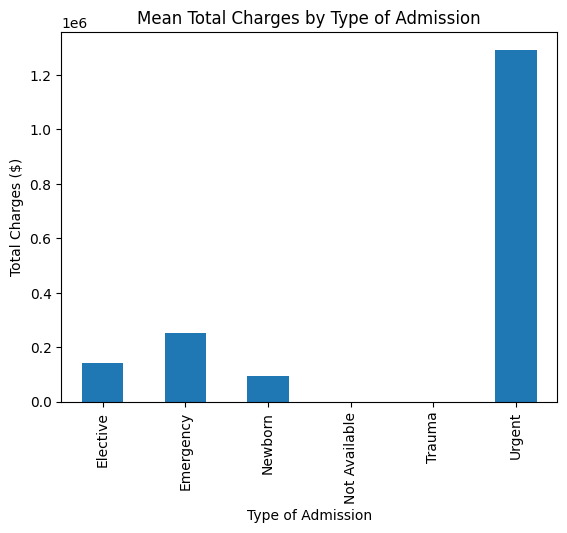

In [37]:
# Group by Type of Admission and calculate the mean of Total Charges
mean_charges_by_admission_type = data_subset.groupby('Type of Admission')['Total Charges'].mean()

# Display the result
print("Mean Total Charges by Type of Admission:")
print(mean_charges_by_admission_type)

# Visualize the trend with a bar plot
mean_charges_by_admission_type.plot(kind='bar', title='Mean Total Charges by Type of Admission', ylabel='Total Charges ($)')
plt.show()

Mean Total Charges by Gender:
Gender
F    205763.719305
M    158324.106360
U       729.000000
Name: Total Charges, dtype: float64


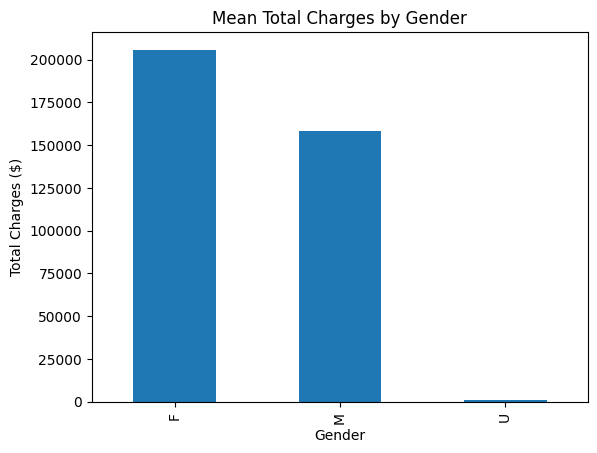

In [38]:
# Group by Gender and calculate the mean of Total Charges
mean_charges_by_gender = data_subset.groupby('Gender')['Total Charges'].mean()

# Display the result
print("Mean Total Charges by Gender:")
print(mean_charges_by_gender)

# Visualize the trend with a bar plot
mean_charges_by_gender.plot(kind='bar', title='Mean Total Charges by Gender', ylabel='Total Charges ($)')
plt.show()


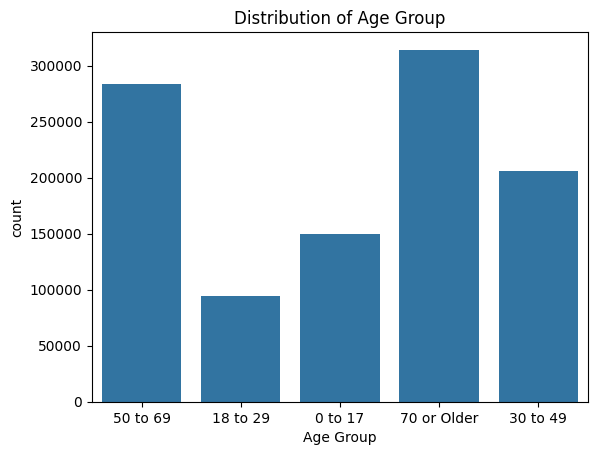

In [12]:
# Bar plot for categorical variables
sns.countplot(data=data_subset, x='Age Group')
plt.title('Distribution of Age Group')
plt.show()

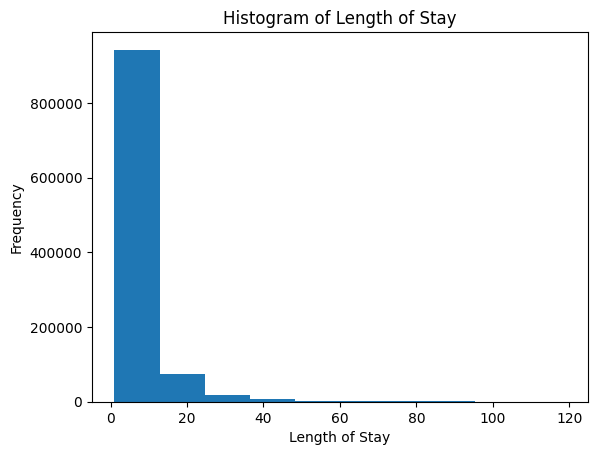

In [24]:
plt.hist(data_subset['Length of Stay'], bins=10)
plt.title('Histogram of Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')
plt.show()

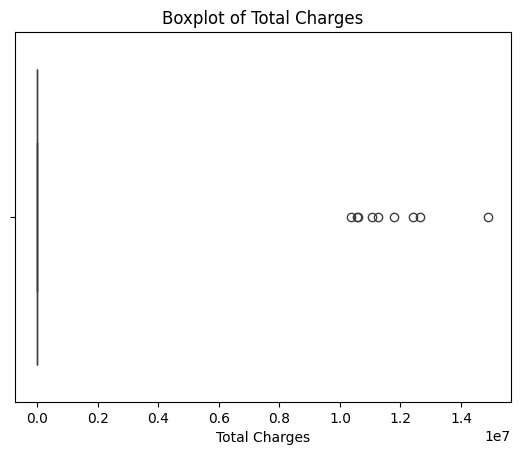

In [14]:
sns.boxplot(data=data_subset, x='Total Charges')
plt.title('Boxplot of Total Charges')
plt.show()

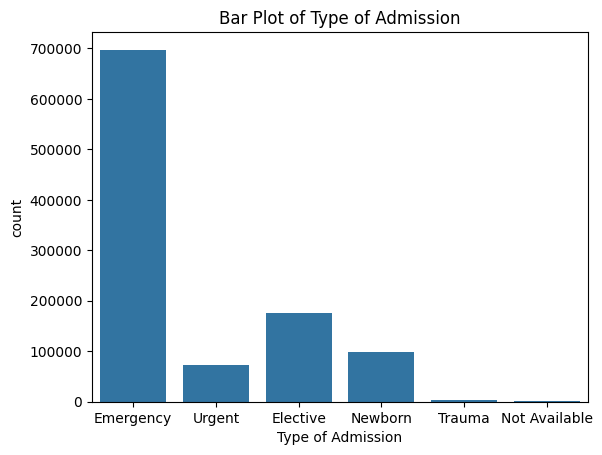

In [15]:
sns.countplot(data=data_subset, x='Type of Admission')
plt.title('Bar Plot of Type of Admission')
plt.show()

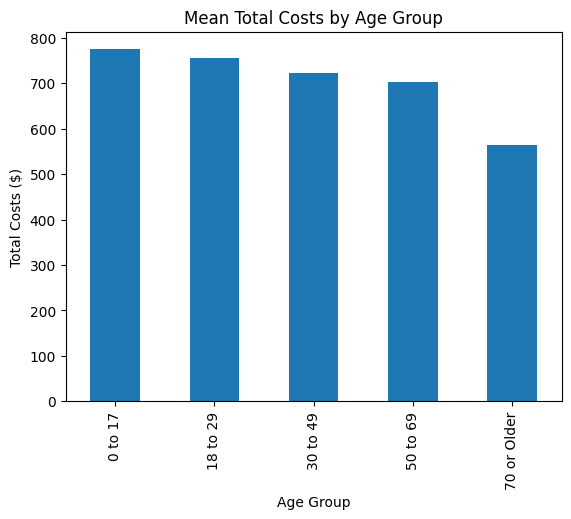

In [32]:
# Bar plot for mean total costs by age group
mean_total_costs_by_age_group.plot(kind='bar', title='Mean Total Costs by Age Group', ylabel='Total Costs ($)')
plt.show()

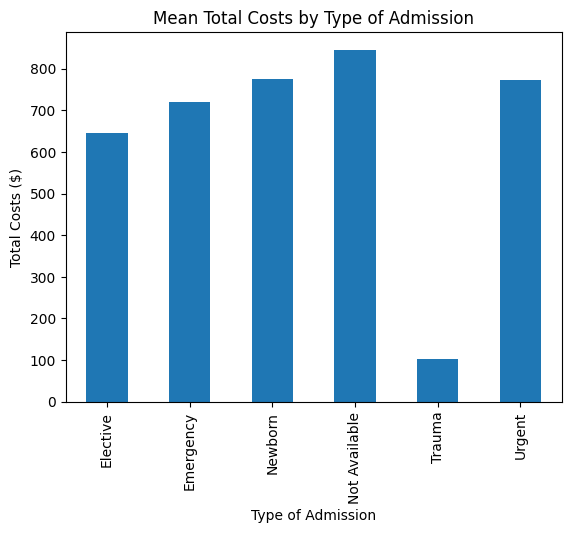

In [33]:
# Bar plot for mean total costs by type of admission
mean_total_costs_by_admission_type.plot(kind='bar', title='Mean Total Costs by Type of Admission', ylabel='Total Costs ($)')
plt.show()

In [16]:
# Check for missing values
missing_data = data_subset.isnull().sum()
print(missing_data)

Age Group                  0
Gender                     0
Length of Stay          1037
Total Charges        1048004
Total Costs          1036158
Type of Admission          0
dtype: int64


In [19]:
import numpy as np # Import the numpy library and assign it the alias 'np'

# Dropping rows with missing data
data_subset_cleaned = data_subset.dropna()

# Or, filling with the median for numeric columns only
numeric_cols = data_subset.select_dtypes(include=np.number).columns # Now np is defined and can be used
data_subset_filled = data_subset.fillna(data_subset[numeric_cols].median())

### Summary of Findings: Descriptive Analytics on SPARCS 2022 Data


#### 1. **Average Length of Stay**
   - The average length of stay (LOS) in the dataset was calculated at approximately 5.73 days.
   - A histogram of the LOS shows that the majority of patients have relatively short hospital stays, with a right-skewed distribution indicating some outliers with much longer stays.

#### 2. **Variation in Total Costs by Age Group and Type of Admission**
##### Age Group:
  - The analysis revealed that total costs generally decreased with age. Younger age groups, particularly 0 to 17, had higher total costs compared to older groups.
  - On average, patients in the 0 to 17 Age Group had the highest total costs, while the oldest age group, 70 or older, had the lowest costs.

##### Type of Admission:
  - 'Not Available' admissions had the highest total costs. This is likely due to the wide variety of admissions within this category and complexity of care required.
  - Urgent and newborn admissions were close runner ups behind 'Not Available' for the highest costs.
  - Trauma admissions incurred significantly lower costs on average compared to all other categories of admissions.
  - A bar plot of total costs by type of admission visually highlighted this disparity.

#### 3. **Trends in Admission Type/Charges**
   - Emergency admissions accounted for the highest proportion, followed by Elective admissions. This trend aligns with common expectations in hospital inpatient data, where emergency care often dominates the total number of admissions.
   - A bar plot visualizing the distribution of admission types revealed that emergency admissions made up a vast majority of admissions.
   - A bar plot showing Mean Total Charges by Type of Admission showed that Urgent Admissions were associated with the highest charges by far.
   - A bar plot visualizing Mean Total Charges by Gender showed that Females are charged higher than Males on average.
